<a href="https://colab.research.google.com/github/MuleHakim/Harmony-Search/blob/main/HarmonySearch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Harmony Search Implementation**


> Harmony Search (HS) is a metaheuristic optimization algorithm inspired by the improvisation process of musicians seeking a perfect state of harmony. Developed by Z. W. Geem et al. in 2001, HS has gained popularity for solving various optimization problems. It draws parallels between the harmony in music and optimality in problem-solving processes. This algorithm has found applications in diverse fields such as function optimization, water distribution networks, structural design, and vehicle routing.


> In this implementation, we have employed the Harmony Search algorithm as a versatile optimization tool, catering to:

  > 1.   **general-purpose scenarios**
  > 2.   **specific application in optimizing the Rosenbrock's Banana function**.
  > 3.   **Solving Vehicle Routing Problem (VRP)**

> 1. The general-purpose implementation allows users to provide any objective function for minimization, offering flexibility in tackling diverse optimization challenges. Simultaneously, the specialization for the Rosenbrock's function showcases the algorithm's efficacy in addressing specific optimization tasks.

> 2. By utilizing a harmony memory and iteratively refining solutions through a combination of randomization, pitch adjustment, and acceptance criteria, the Harmony Search algorithm demonstrates its adaptability and effectiveness in finding optimal solutions across various optimization landscapes, exemplified through the specific lens of the Rosenbrock's function.

> 3. One real-world problem that can be addressed using the Harmony Search algorithm is the Vehicle Routing Problem (VRP). The VRP is a logistics and optimization challenge that involves determining the most efficient routes for a fleet of vehicles to deliver goods to a set of customers while minimizing total transportation costs.



# 1. General-purpose Harmony Search optimization algorithm

It's designed to optimize any given objective function. It uses a modular structure with functions for initializing harmony memory, generating new harmonies, updating the harmony memory, and performing the harmony search

In [8]:
import numpy as np
import matplotlib.pyplot as plt


> **Objective Function (objective_function)**:
> This function defines the objective that the Harmony Search algorithm is trying to minimize. In this case, it's the sum of squared values of the input vector.

In [9]:
def objective_function(x):
    """Objective function to be minimized."""
    return sum(x**2)




> **Initialization of Harmony Memory (initialize_harmony_memory)**:
> This function generates an initial set of harmonies with random values within specified bounds. The harmony memory is a collection of potential solutions.



In [10]:
def initialize_harmony_memory(hm_size, num_variables, lower_bound, upper_bound):
    """Initialize harmony memory with random values within bounds."""
    return np.random.uniform(lower_bound, upper_bound, (hm_size, num_variables))




>**Improvise New Harmony (improvise_new_harmony)**:
> This function generates a new harmony by either selecting a value from an existing harmony (with a certain probability defined by bandwidth) or introducing randomness within the variable bounds.



In [11]:
def improvise_new_harmony(harmony_memory, bandwidth, lower_bound, upper_bound):
    """Generate a new harmony by combining existing harmonies or introducing randomness."""
    new_harmony = np.zeros_like(harmony_memory[0])

    for i in range(len(new_harmony)):
        if np.random.rand() < bandwidth:
            new_harmony[i] = harmony_memory[np.random.randint(len(harmony_memory)), i]
        else:
            new_harmony[i] = np.random.uniform(lower_bound[i], upper_bound[i])

    return new_harmony


> **Update Harmony Memory (update_harmony_memory)**:
> This function updates the harmony memory if the newly generated harmony has a better fitness value than the worst harmony in the current memory.

In [12]:
def update_harmony_memory(harmony_memory, harmony_memory_fitness, new_harmony, new_harmony_fitness):
    """Update harmony memory if the new harmony is better than the worst harmony."""
    worst_index = np.argmax(harmony_memory_fitness)
    if new_harmony_fitness < harmony_memory_fitness[worst_index]:
        harmony_memory[worst_index] = new_harmony
        harmony_memory_fitness[worst_index] = new_harmony_fitness



> **Harmony Search Algorithm (harmony_search)**:
> This is the main function that implements the Harmony Search algorithm. It iteratively generates new harmonies, updates the harmony memory, and records the best fitness values over iterations.

In [13]:
def harmony_search(num_iterations, hm_size, num_variables, lower_bound, upper_bound, bandwidth):
    """Perform the Harmony Search optimization algorithm."""
    print("It may take a few minutes ...")
    harmony_memory = initialize_harmony_memory(hm_size, num_variables, lower_bound, upper_bound)
    harmony_memory_fitness = np.array([objective_function(h) for h in harmony_memory])

    # Store the best fitness at each iteration for visualization
    best_fitness_history = []

    for iteration in range(num_iterations):
        new_harmony = improvise_new_harmony(harmony_memory, bandwidth, lower_bound, upper_bound)
        new_harmony_fitness = objective_function(new_harmony)

        update_harmony_memory(harmony_memory, harmony_memory_fitness, new_harmony, new_harmony_fitness)

        best_fitness_history.append(min(harmony_memory_fitness))

    best_solution = harmony_memory[np.argmin(harmony_memory_fitness)]
    return best_solution, objective_function(best_solution), best_fitness_history, harmony_memory, harmony_memory_fitness


> **Plot Convergence (plot_convergence)**:
> This function visualizes the convergence of the algorithm by plotting the best fitness values over iterations.

In [14]:
def plot_convergence(best_fitness_history):
    """Plot the convergence of Harmony Search algorithm."""
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(best_fitness_history) + 1), best_fitness_history, marker='o')
    plt.title("Harmony Search Convergence")
    plt.xlabel("Iteration")
    plt.ylabel("Best Fitness Value")
    plt.grid(True)
    plt.show()


> **Plot Harmony Memory Evolution (plot_harmony_memory_evolution)**:
> This function visualizes how the values of each variable in the harmony memory evolve over iterations.

In [15]:
def plot_harmony_memory_evolution(harmony_memory):
    """Plot the evolution of Harmony Memory variables over iterations."""
    plt.figure(figsize=(10, 8))
    for i in range(harmony_memory.shape[1]):
        plt.plot(range(1, len(harmony_memory) + 1), harmony_memory[:, i], label=f'Variable {i + 1}')

    plt.title("Harmony Memory Evolution")
    plt.xlabel("Iteration")
    plt.ylabel("Variable Value")
    plt.legend()
    plt.grid(True)
    plt.show()


> **Plot Harmony Memory Fitness (plot_harmony_memory_fitness)**:
> This function visualizes the fitness values of the harmony memory over iterations.

In [16]:
def plot_harmony_memory_fitness(harmony_memory_fitness):
    """Plot the fitness values of Harmony Memory over iterations."""
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, len(harmony_memory_fitness) + 1), harmony_memory_fitness, marker='o', color='orange')
    plt.title("Harmony Memory Fitness")
    plt.xlabel("Iteration")
    plt.ylabel("Fitness Value")
    plt.grid(True)
    plt.show()


In [17]:

# Example usage with individual visualizations
num_iterations = 2000
hm_size = 10
num_variables = 5
lower_bound = [-5, -5, -5, -5, -5]
upper_bound = [5, 5, 5, 5, 5]
bandwidth = 0.5

best_solution, best_fitness, best_fitness_history, final_harmony_memory, final_harmony_fitness = harmony_search(
    num_iterations, hm_size, num_variables, lower_bound, upper_bound, bandwidth
)

print("Best solution:", best_solution)
print("Best fitness:", best_fitness)


It may take a few minutes ...
Best solution: [ 0.00204545  0.0934909   0.07815008  0.03377006 -0.12502379]
Best fitness: 0.03162353187608698


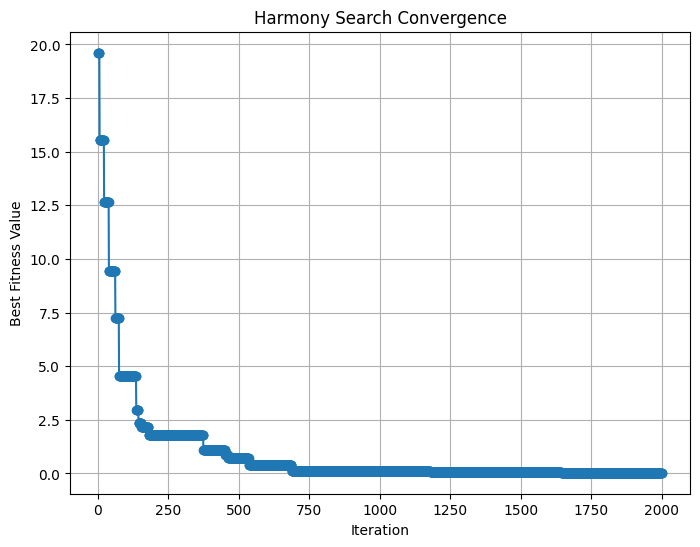

In [18]:
# Individual visualizations
plot_convergence(best_fitness_history)

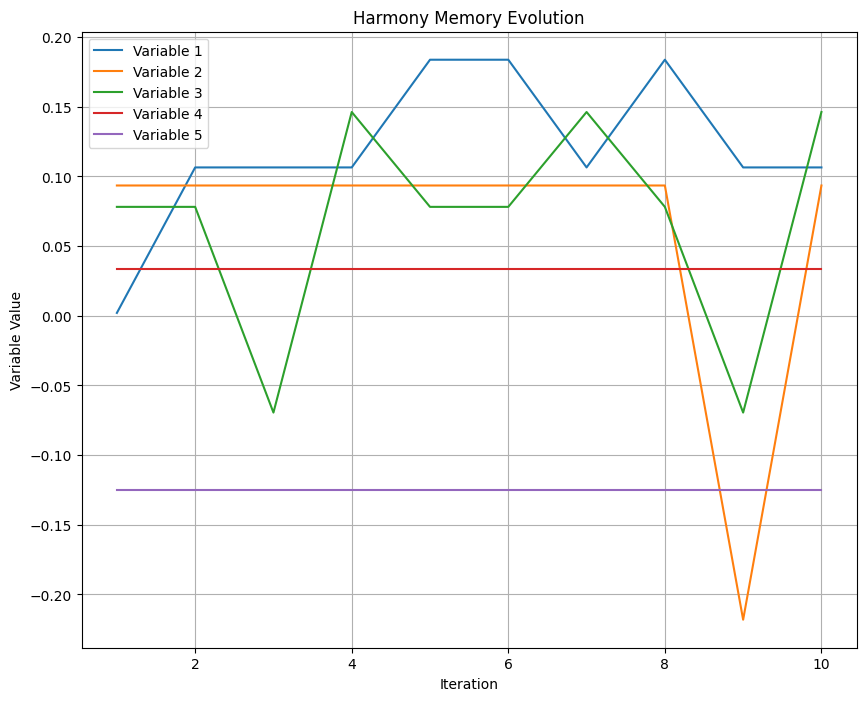

In [19]:
plot_harmony_memory_evolution(final_harmony_memory)

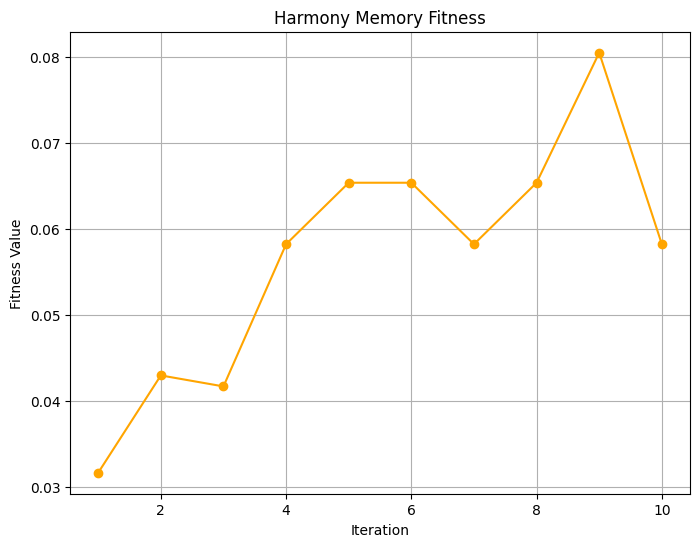

In [20]:
plot_harmony_memory_fitness(final_harmony_fitness)


In [21]:
print("Final Harmony Memory:")
print(final_harmony_memory)


Final Harmony Memory:
[[ 0.00204545  0.0934909   0.07815008  0.03377006 -0.12502379]
 [ 0.1064566   0.0934909   0.07815008  0.03377006 -0.12502379]
 [ 0.1064566   0.0934909  -0.06947904  0.03377006 -0.12502379]
 [ 0.1064566   0.0934909   0.14623062  0.03377006 -0.12502379]
 [ 0.18375483  0.0934909   0.07815008  0.03377006 -0.12502379]
 [ 0.18375483  0.0934909   0.07815008  0.03377006 -0.12502379]
 [ 0.1064566   0.0934909   0.14623062  0.03377006 -0.12502379]
 [ 0.18375483  0.0934909   0.07815008  0.03377006 -0.12502379]
 [ 0.1064566  -0.21815034 -0.06947904  0.03377006 -0.12502379]
 [ 0.1064566   0.0934909   0.14623062  0.03377006 -0.12502379]]


In [22]:
print("Fitness of Final Harmony Memory:")
print(final_harmony_fitness)

Fitness of Final Harmony Memory:
[0.03162353 0.04295236 0.04167226 0.05822831 0.06538519 0.06538519
 0.05822831 0.06538519 0.08052128 0.05822831]


This implementation is flexible and can be applied to a wide range of optimization problems by defining an appropriate objective function.



---
---


# 2. **Implementation for Specific predefined optimazation**

## **Optimize Rosenbrock's Banana function**

> The implementation includes a function hs_simple that takes the function to be optimized and the maximum number of attempts as input

> The following implementation is specifically designed for solving a predefined optimization problem using Harmony Search. It optimizes Rosenbrock's Banana function.

In [23]:
def harmony_rosenbrock(fun, max_attempt=25000):
    print("It may take a few minutes ...")

    if not callable(fun):
        # If the provided function is not callable, use a default function (Rosenbrock's Banana function)
        def fun(x):
            return (1 - x[0]) ** 2 + 100 * (x[1] - x[0] ** 2) ** 2

    ndim = 2
    range_limits = np.array([[-10, 10], [-10, 10]])
    pa_range = np.array([200, 200])

    HS_size = 20
    HM_accept_rate = 0.95
    PA_rate = 0.7

    # Initialize Harmony Memory
    HM = np.random.uniform(range_limits[:, 0], range_limits[:, 1], size=(HS_size, ndim))
    HM_best = np.array([fun(x) for x in HM])

    # Harmony Search
    for count in range(1, max_attempt + 1):
        for j in range(ndim):
            if np.random.rand() < HM_accept_rate:
                if np.random.rand() <= PA_rate:
                    # Pitch Adjusting
                    pa = (range_limits[j, 1] - range_limits[j, 0]) / pa_range[j]
                    HM[:, j] = HM[:, j] + pa * (np.random.rand(HS_size) - 0.5)
                else:
                    # Harmony Memory Accepting Rate
                    HM[:, j] = HM[np.random.randint(HS_size, size=HS_size), j]
            else:
                # New Search via Randomization
                HM[:, j] = np.random.uniform(range_limits[j, 0], range_limits[j, 1], size=HS_size)

        # Evaluate the new solutions
        f_best = fun(HM[0])
        HS_max_num = 0
        HS_min_num = 0
        HS_max = HM_best[0]
        HS_min = HM_best[0]

        for i in range(1, HS_size):
            f_i = fun(HM[i])
            if f_i > HS_max:
                HS_max_num = i
                HS_max = f_i
            if f_i < HS_min:
                HS_min_num = i
                HS_min = f_i

        # Update the current solution if better
        if f_best > HS_max:
            HM[HS_max_num] = HM[0]
            HM_best[HS_max_num] = f_best

    # Find the best solution in Harmony Memory
    best_index = np.argmin(HM_best)
    best_solution = HM[best_index]

    return best_solution, fun(best_solution)



In [24]:

# Example usage
best_solution, best_fitness = harmony_rosenbrock(None, 20000)
print("Best solution:", best_solution)
print("Best fitness:", best_fitness)

It may take a few minutes ...
Best solution: [-3.63650584  6.64565704]
Best fitness: 4349.186730679029


> This implementation is more specialized and may be easier to use for someone who just wants to apply the Harmony Search algorithm to a specific problem without dealing with the modular structure.

> This code implements the Harmony Search algorithm specifically for the Rosenbrock's Banana function, optimizing it in a two-dimensional space. The algorithm iteratively refines a Harmony Memory by generating new solutions and updating based on the acceptance criteria. The final result is the best solution found during the iterations.



---
---


#3. Vehicle Routing Problem (VRP)


>  This is a simplified version, and in a real-world scenario, you might want to consider additional constraints such as time windows, vehicle capacity constraints, and others. The above code assumes a basic Capacitated VRP without these additional constraints.

In [30]:
# VRP Parameters
num_customers = 20
vehicle_capacity = 50

# Generate Random Customer Locations and Demands
np.random.seed(0)
customer_locations = np.random.rand(num_customers, 2) * 10
customer_demands = np.random.randint(1, 10, size=num_customers)

# Harmony Search Parameters
num_vehicles = 3
num_iterations = 100
hm_size = 10
bandwidth = 0.5



> **Distance Matrix Calculation**: This function calculates the distance matrix between locations. It uses the Euclidean distance formula to compute the distance between each pair of locations.

In [31]:
def calculate_distance_matrix(locations):
    num_locations = len(locations)
    distance_matrix = np.zeros((num_locations, num_locations))
    for i in range(num_locations):
        for j in range(num_locations):
            distance_matrix[i, j] = np.linalg.norm(locations[i] - locations[j])
    return distance_matrix


> **VRP Objective Function**: The VRP (Vehicle Routing Problem) objective function evaluates the fitness of a solution based on the total distance traveled and the satisfaction of demand constraints. It penalizes solutions that exceed the vehicle capacity.

In [32]:
def vrp_objective(solution, distance_matrix, demands, capacity):
    total_distance = 0
    total_demand = 0
    current_route_distance = 0
    current_route_demand = 0
    for i in range(len(solution)-1):
        if solution[i] == 1:
            total_distance += current_route_distance
            total_demand += current_route_demand
            current_route_distance = 0
            current_route_demand = 0
        current_route_distance += distance_matrix[i, i + 1]
        current_route_demand += demands[i]
    total_distance += current_route_distance  # Add the last route
    total_demand += current_route_demand
    penalty = 1000 * max(0, total_demand - capacity)
    return total_distance + penalty


In [33]:
def initialize_harmony_memory(hm_size, num_variables):
    return np.random.randint(2, size=(hm_size, num_variables))

def improvise_new_harmony(harmony_memory, bandwidth):
    new_harmony = np.zeros_like(harmony_memory[0])
    for i in range(len(new_harmony)):
        if np.random.rand() < bandwidth:
            new_harmony[i] = harmony_memory[np.random.randint(len(harmony_memory)), i]
        else:
            new_harmony[i] = np.random.randint(2)
    return new_harmony

def update_harmony_memory(harmony_memory, harmony_memory_fitness, new_harmony, new_harmony_fitness):
    worst_index = np.argmax(harmony_memory_fitness)
    if new_harmony_fitness < harmony_memory_fitness[worst_index]:
        harmony_memory[worst_index] = new_harmony
        harmony_memory_fitness[worst_index] = new_harmony_fitness

def harmony_search_vrp(num_iterations, hm_size, num_variables, bandwidth, distance_matrix, demands, capacity):
    harmony_memory = initialize_harmony_memory(hm_size, num_variables)
    harmony_memory_fitness = np.array([vrp_objective(h, distance_matrix, demands, capacity) for h in harmony_memory])

    best_fitness_history = []

    for iteration in range(num_iterations):
        new_harmony = improvise_new_harmony(harmony_memory, bandwidth)
        new_harmony_fitness = vrp_objective(new_harmony, distance_matrix, demands, capacity)

        update_harmony_memory(harmony_memory, harmony_memory_fitness, new_harmony, new_harmony_fitness)

        best_fitness_history.append(min(harmony_memory_fitness))

    best_solution_index = np.argmin(harmony_memory_fitness)
    best_solution = harmony_memory[best_solution_index]

    return best_solution, best_fitness_history

def plot_convergence(best_fitness_history):
    plt.plot(range(1, len(best_fitness_history) + 1), best_fitness_history, marker='o')
    plt.title("VRP Harmony Search Convergence")
    plt.xlabel("Iteration")
    plt.ylabel("Best Fitness Value")
    plt.grid(True)
    plt.show()



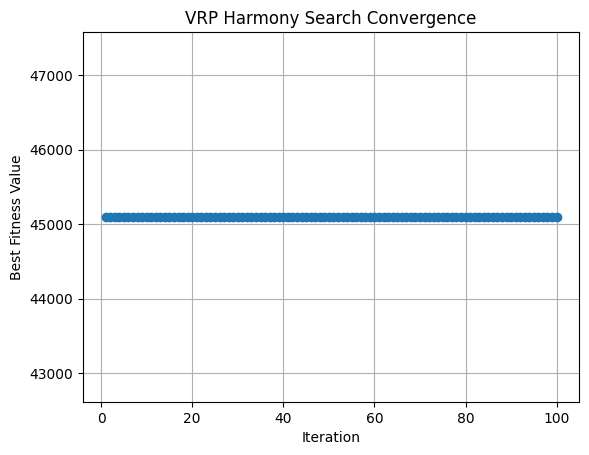


Best solution (binary representation): [0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1]

Best fitness history:  [45095.77725732548, 45095.77725732548, 45095.77725732548, 45095.77725732548, 45095.77725732548, 45095.77725732548, 45095.77725732548, 45095.77725732548, 45095.77725732548, 45095.77725732548, 45095.77725732548, 45095.77725732548, 45095.77725732548, 45095.77725732548, 45095.77725732548, 45095.77725732548, 45095.77725732548, 45095.77725732548, 45095.77725732548, 45095.77725732548, 45095.77725732548, 45095.77725732548, 45095.77725732548, 45095.77725732548, 45095.77725732548, 45095.77725732548, 45095.77725732548, 45095.77725732548, 45095.77725732548, 45095.77725732548, 45095.77725732548, 45095.77725732548, 45095.77725732548, 45095.77725732548, 45095.77725732548, 45095.77725732548, 45095.77725732548, 45095.77725732548, 45095.77725732548, 45095.77725732548, 45095.77725732548, 45095.77725732548, 45095.77725732548, 45095.77725732548, 45095.77725732548, 45095.77725732548, 45095.77725732548

In [34]:
# Calculate distance matrix
depot_location = np.array([[0, 0]])
distance_matrix = calculate_distance_matrix(np.concatenate((depot_location, customer_locations)))
# Initialize demands and capacity
demands = np.concatenate(([0], customer_demands, [0]))
vehicle_capacity = 50

# VRP using Harmony Search
best_solution, best_fitness_history = harmony_search_vrp(num_iterations, hm_size, num_customers + 1, bandwidth, distance_matrix, demands, vehicle_capacity)

# Plot the convergence
plot_convergence(best_fitness_history)

print("\nBest solution (binary representation):", best_solution)
print("\nBest fitness history: ", best_fitness_history)

> The **Best fitness history:** represents the fitness value (objective function value) of the best solution found by the Harmony Search algorithm at each iteration. In your case, the history shows that the algorithm did not find a better solution throughout the optimization process. The fitness value remains constant at 45095.78 for all iterations, indicating that the algorithm did not improve the solution.

> The **Best solution (binary representation):** is a binary vector that represents a solution to the Vehicle Routing Problem (VRP). Each element in the binary vector corresponds to a decision variable, indicating whether a customer is included in a route (1) or not (0). The binary representation you provided is [0 1 0 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1]. In this representation, a 1 at index i means that the customer i is included in the route, and 0 means the customer is not included.

> The constant fitness value and the binary representation suggest that the Harmony Search algorithm converged to a suboptimal solution early in the optimization process and was unable to improve it further. This could be due to various factors such as parameter settings, problem representation, or the specific characteristics of the problem instance.

In [35]:
# Decode the binary solution to routes
routes = []
current_route = [0]  # Depot
for i in range(len(best_solution)):
    if best_solution[i] == 1:
        current_route.append(0)  # Depot
        routes.append(current_route)
        current_route = [0]  # Start a new route from the depot
    else:
        current_route.append(i + 1)  # Customer index

# Print the decoded routes
print("\nDecoded Routes:")
for i, route in enumerate(routes):
    print(f"Route {i + 1}: {route}")


Decoded Routes:
Route 1: [0, 1, 0]
Route 2: [0, 3, 0]
Route 3: [0, 5, 0]
Route 4: [0, 0]
Route 5: [0, 0]
Route 6: [0, 0]
Route 7: [0, 0]
Route 8: [0, 11, 0]
Route 9: [0, 0]
Route 10: [0, 0]
Route 11: [0, 0]
Route 12: [0, 16, 0]
Route 13: [0, 0]
Route 14: [0, 19, 20, 0]


> The provided code implements the Harmony Search algorithm to solve the Vehicle Routing Problem (VRP). The algorithm begins by calculating the distance matrix representing the distances between different locations, considering a depot and a set of customer locations. It then initializes the demands and vehicle capacity for the VRP. The Harmony Search algorithm is applied with modular functions: initializing the harmony memory, improvising new harmonies, updating the memory based on fitness, and performing iterations to find the optimal solution. The objective function evaluates the fitness of potential solutions based on total distance traveled and adherence to vehicle capacity constraints. The algorithm iteratively refines the solutions by balancing exploration and exploitation through the harmony memory. The convergence plot visually illustrates the algorithm's progress, and the final solution in binary representation is printed. This approach aims to efficiently allocate routes for vehicles, minimizing the total distance traveled while satisfying customer demands and capacity constraints.



---



---



## Conclusion

> Harmony Search stands out as a versatile optimization algorithm, finding applications across various domains. Its ability to strike a balance between exploitation and exploration, inspired by musical harmony, makes it a valuable tool for solving complex optimization problems. As with any metaheuristic, parameter tuning and problem-specific adaptations are crucial for achieving optimal results. The presented example showcases the algorithm's effectiveness in finding the optimal solution for a simple mathematical problem, highlighting its potential for broader application.

> In conclusion, Harmony Search provides a harmonious blend of inspiration from music and optimization, offering a unique approach to solving complex problems. Its simplicity, coupled with robust performance, makes it a valuable addition to the toolkit of optimization practitioners. Further research and exploration of Harmony Search in diverse problem domains promise to reveal new dimensions of its capabilities.



---



---



# **Thank you**!

1.  **Muluken Hakim**
2.  **Biniyam Alemu**
3.  **Abdulkarim Getachew**